# Project 1: Image registration

**Contents:** <br>

- [Goal](#goal)<br>
- [Deliverables](#deliverables)<br>
- [Assessment](#assessment)<br>

1. [Getting started](#getting_started)<br>
   
    1.1 [Dataset](#dataset)<br>
    
    1.2 [Selecting corresponding point pairs](#selecting_point_pairs)<br>
    
    
2. [Point-based registration](#point-based_reg)<br>
    
    2.1 [Point-based affine image registration](#affine)<br>
    
    2.2 [Evaluation of point-based affine image registration](#evaluation)<br>
    
    
3. [Intensity-based registration](#intensity-based_reg)<br>
    
    3.1 [Comparing the results of different registration methods](#comparison)<br>

<div id="goal"></div>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## Goal
Develop Python code for point-based and intensity-based (medical) image registration. Use the developed code to perform image registration and evaluate and analyze the results.

The dataset you will be using in the first mini-project originates from the [MRBrainS medical image analysis challenge](http://mrbrains13.isi.uu.nl/). It consists of 30 traverse slices of MR brain scans with two different sequences: T1-weighted and T2-FLAIR (5 patients $\times$ 3 slices per patient $\times$ 2 modalities). Please see the [Getting started](#getting_started) assignment below for more details on the dataset.

<div id="deliverables"></div>

## Deliverables
Code and a report describing your implementation, results and analysis. There is no hard limit for the length of the report, however, concise and short reports are **strongly** encouraged. Aim to present your most important findings in the main body of the report and (if needed) any additional information in an appendix. The following report structure is suggested for the main body of the report:

1. Introduction
2. Methods
3. Results
4. Discussion

The introduction and result sections can be very brief in this case (e.g. half a page each). The discussion section should contain the analysis of the results. The report must be submitted as a single PDF file. The code must be submitted as a single archive file (e.g. zip or 7z) that is self-contained and can be used to reproduce the results in the report. 

Note that there is no single correct solution for the project. You have to demonstrate to the reader that you understand the methods that you have studied and can critically analyze the results of applying the methods. Below, you can find a set of assignments (guided project work) that will help you get started with the project work and, when correctly completed, will present you with a **minimal solution**. Solutions which go beyond these assignments are of course encouraged.

<div id="assessment"></div>

## Assessment
The rubric that will be used for assessment of the project work is given in [this table](https://github.com/tueimage/8dc00-mia/blob/master/rubric.md)

In [3]:
%load_ext autoreload
%autoreload 2

<div id="getting_started"></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## 1. Getting started
As an introduction, you will get familiar with the dataset that will be used in the first mini-project and the control point selection tool that can be used to annotate corresponding points in pairs of related images. The annotated points can later be used to perform point-based registration and evaluation of the registration error.

<div id="dataset"></div>

### 1.1 Dataset

The image dataset is located in the [image_data](https://github.com/tueimage/8dc00-mia/tree/master/data/image_data) subfolder of the code for the registration exercises and project. The image filenames have the following format: `{Patient ID}_{Slice ID}_{Sequence}.tif`. For example, the filename `3_2_t1.tif` is the second slice from a T1-weighted scan of the third patient. Every T1 slice comes in two versions: original and transformed with some random transformation that can be identified with the `_d` suffix in the filename. This simulates a registration problem where you have to register two image acquisitions of the same patient (note however that some of the transformations that were used to simulate the second set of images are not realistic for brain imaging, e.g. brain scans typically do not encounter shearing between consecutive acquisitions).

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 1*:

With this dataset we can define two image registration problems: T1 to T1 registration (e.g. register `3_2_t1_d.tif` to `3_2_t1.tif`) and T2 to T1 registration (e.g. register `3_2_t2.tif` to `3_2_t1.tif`). Which one of these can be considered inter-modal image registration and which one intra-modal image registration?

***Answer:*** Inter-modal means between modalities. In this case, it refers to the registration from T2 to T1. Intra-modal means within a modality, in other words, we use the same modality multiple times. In this case this refers to T1 to T1 registration.

<div id="selecting_point_pairs"></div>

### 1.2 Selecting corresponding point pairs

A function called `cpselect` is provided to select control points in two different images. This function provides two numpy arrays of cartesian coordinates, one array for each image, of points selected in the two images. The coordinate format is a numpy array with the X and Y on row 0 and 1 respectively, and each column being a point.

Calling the function will cause a new interactive window to pop up, where you will see your two images and some instructions.
For convenience, the instructions can also be found below:

* First select a point in Image 1 and then its corresponding point in Image 2. This pattern should be repeated for as many control points as you need. If you do not follow this pattern, the output arrays will be incorrect.
* Left Mouse Button to create a point. 
* Right Mouse Button/Delete/Backspace to remove the newest point. 
* Middle Mouse Button/Enter to finish placing points. 

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 1*:

Test the functionality of `cpselect` by running the following code example:

In [4]:
import sys
sys.path.append("../code")
import registration_util as util

I_path = '../data/image_data/1_1_t1.tif'
Im_path = '../data/image_data/1_1_t1_d.tif'

X, Xm = util.cpselect(I_path, Im_path)

print('X:\n{}'.format(X))
print('Xm:\n{}'.format(Xm))

X:
[[124.68709677 151.51290323]
 [105.94387097 130.21483871]]
Xm:
[[126.54516129 152.09354839]
 [103.38903226 131.49225806]]


<div id="point-based_reg"></div>

## 2. Point-based registration

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

<div id="affine"></div>

### 2.1 Point-based affine image registration

From the provided dataset for this project, select one pair of T1 image slices (e.g. `3_2_t1.tif` and `3_2_t1_d.tif`) and use `my_cpselect` to select a set of corresponding points. Then, compute the affine transformation between the pair of images with `ls_affine` and apply it to the moving image using `image_transform`. 

Repeat the same for a pair of corresponding T1 and T2 slices (e.g. `3_2_t1.tif` and `3_2_t2.tif`).

A shape:  (3, 3)
b shape:  (3,)
The transformation matrix is 
 [[ 0.99717514 -0.03013183  1.81470081]
 [-0.00282486  0.96986817 -1.24766478]
 [ 0.          0.          1.        ]]


FileNotFoundError: [Errno 2] No such file or directory: '../images Point_based/Point-based_t1_vs_t1d.png'

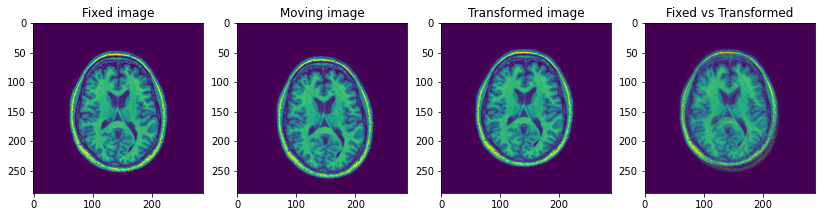

In [25]:
#import registration as reg
%matplotlib inline
import sys
sys.path.append("../code")
import registration_util as util
import registration as reg
import matplotlib.pyplot as plt

# Select the pair images to register 
    #I_path is fixed image
    #Im_path is moving image

#select images
I_path = '../data/image_data/1_2_t1.tif'
Im_path = '../data/image_data/1_2_t1_d.tif'
X, Xm = util.cpselect(I_path, Im_path)

I = plt.imread(I_path)
Im = plt.imread(Im_path)

#transform to homogenous coordinates
X = util.c2h(X)
Xm = util.c2h(Xm)
T = reg.ls_affine(X, Xm); print("The transformation matrix is \n", T)

#apply transformation
T_Xm_h, T_Xm_coor = reg.image_transform(I, T)

#plot
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
im1 = ax1.imshow(I)
ax1.set_title('Fixed image')
im2 = ax2.imshow(Im)
ax2.set_title('Moving image')
im3 = ax3.imshow(T_Xm_h)
ax3.set_title('Transformed image')
im4 = ax4.imshow(I)
im5 = ax4.imshow(T_Xm_h, alpha=0.7)
ax4.set_title('Fixed vs Transformed')

plt.savefig('Point-based_t1_vs_t1d')

<div id="evaluation"></div>

### 2.2 Evaluation of point-based affine image registration

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 2*:
Describe how you would estimate the registration error. (Hint: Should you use the same points that you used for computing the affine transformation to also compute the registration error?) How does the number of corresponding point pairs affect the registration error? Motivate all your answers.

***Answer:*** 

We should select different target points than registration points. This is important as we need an independent test of the registration quality. The registration points are not independent as we used a minimization to minimize the error specific to these point sets. It is very likely that other points will lead to a larger error. The target points should be selected in locations relevant for some treatment or diagnosis, as it is important to verify that we can compare measured values at these locations.

The larger the number of corresponding point pairs, the smaller the registration error. This decrease occurs due to an increased constraint of the registration procedure. 

<div id="intensity-based_reg"></div>

## 3. Intensity-based registration

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

<div id="comparison"></div>

### 3.1 Comparing the results of different registration methods

The following Python script (provided as `intensity_based_registration_demo()`) performs rigid intensity-based registration of two images using the normalized-cross correlation as a similarity metric:

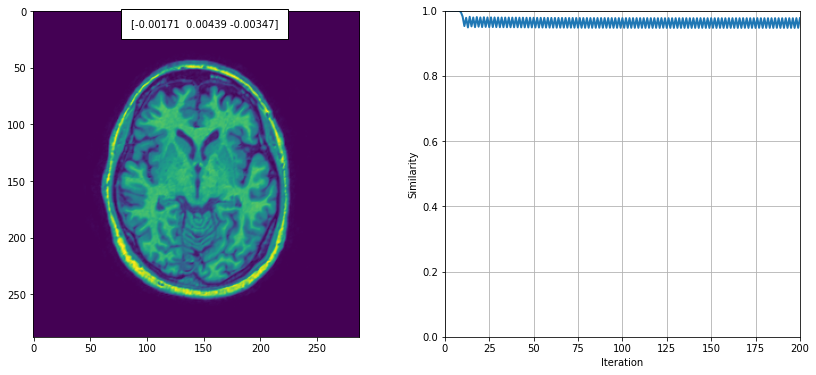

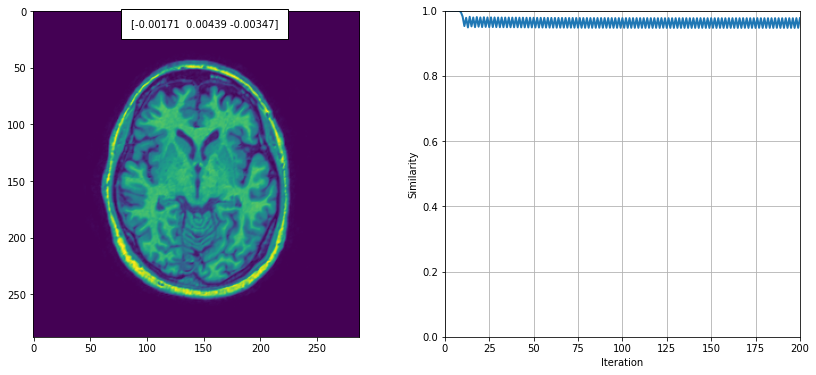

In [6]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_project import intensity_based_registration_demo

intensity_based_registration_demo() # this is case 1. from Task 2

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 2*:

By changing the similarity function and the initial parameter vector, you can also use this script to perform affine registration and use mutual information as a similarity measure. Do not forget to also change the transformation for the visualization of the results.

Using the provided dataset and the functions that you have implemented in the exercises, perform the following series of experiments:

1. Rigid intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) using normalized cross-correlation as a similarity measure.
2. Affine intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) using normalized cross-correlation as a similarity measure.
3. Affine intensity-based registration of a T1 and a T2 slice (e.g. `1_1_t1.tif` and `1_1_t2.tif`) using normalized cross-correlation as a similarity measure.
4. Affine intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) using mutual information as a similarity measure.
5. Affine intensity-based registration of a T1 slice and a T2 slice (e.g. `1_1_t1.tif` and `1_1_t2.tif`) using mutual information as a similarity measure.

Describe, analyze and compare the results from each experiment. If a method fails, describe why you think it fails. Note that you will most likely have to try different values for the learning rate in each experiment in order to find the one that works best. 

In [ ]:
from registration_project import affine_ib_reg_cross_correlation
from registration_project import affine_ib_reg_mutual_information

affine_ib_reg_cross_correlation('1_1_t1.tif', '1_1_t1_d.tif') # 2
affine_ib_reg_cross_correlation('1_1_t1.tif', '1_1_t2.tif') # 3
affine_ib_reg_mutual_information('1_1_t1.tif', '1_1_t1_d.tif') # 4
affine_ib_reg_mutual_information('1_1_t1.tif', '1_1_t2.tif') # 5

### *Report*:

A function, ib_reg(), was created, which can handle all combinations of rigid registration, affine registration, cross-correlation as a metric and mutual information as a metric. 

First, we would like to study the effect of the learning rate on the registration procedure. We do this by calling our function for different learning rate values. We will use an affine registration between a T1 and transformed T1 image. Resulting graphs are saved automatically and will be shown in the report.  

In [8]:
from registration_project import ib_reg

mu_s = [0.00005, 0.0003, 0.001] 
fig_names = ["small_mu", "intermediate_mu", "large_mu"]
for mu, fig_name in zip(mu_s, fig_names):
    ib_reg('1_2_t1.tif', '1_2_t1_d.tif', "affine", "cc", mu=mu, num_iter=200, fig_name=fig_name, live_plotting=False)

Next, we will show the difference in similarity between a rigid and affine registration. We do this again for registrations between a T1 and transformed T1 image. Resulting graphs are saved automatically and will be shown in the report. 

In [9]:
# compare rigid and affine
mu_rigid = 0.0015;
ib_reg('1_2_t1.tif', '1_2_t1_d.tif', "rigid", "cc", mu=mu_rigid, num_iter=200, fig_name="rigid_vs_affine_rigid", live_plotting=False)
mu_affine = 0.0003; 
ib_reg('1_2_t1.tif', '1_2_t1_d.tif', "affine", "cc", mu=mu_affine, num_iter=200, fig_name="rigid_vs_affine_affine", live_plotting=False)

Afterwards, we will try to find out if cross-correlation or mutual information performs best. We will do this for both two T1 slices and a T1 and T2 slice. Resulting graphs are saved automatically and will be shown in the report. 

OSError: [Errno 22] Invalid argument: '../data/image_data/T11_cc_mi_affine_cc.png'

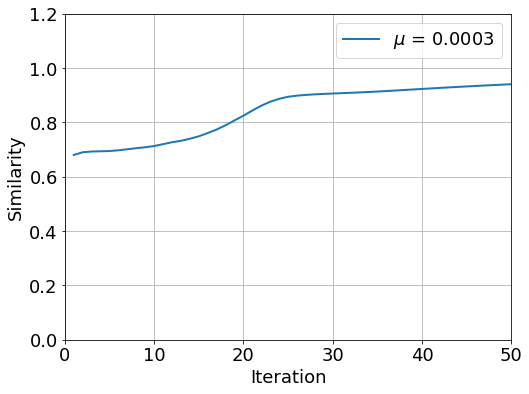

In [15]:
# try cross-correlation and mutual information for T1 and T1_d
mu_cc = 0.0003;
ib_reg('1_2_t1.tif', '1_2_t1_d.tif', "affine", "cc", mu=mu_cc, num_iter=50, fig_name="T11_cc_mi_affine_cc", live_plotting=False)
mu_mi = 0.0002; 
ib_reg('1_2_t1.tif', '1_2_t1_d.tif', "affine", "mi", mu=mu_mi, num_iter=50, fig_name="T11_cc_mi_affine_mi", live_plotting=False)

In [12]:
# try cross-correlation and mutual information for T1 and T2
ib_reg('1_2_t1.tif', '1_2_t2.tif', "affine", "cc", mu=mu_cc, num_iter=200, fig_name="T12_cc_mi_affine_cc", live_plotting=False)
ib_reg('1_2_t1.tif', '1_2_t2.tif', "affine", "mi", mu=mu_mi, num_iter=200, fig_name="T12_cc_mi_affine_mi", live_plotting=False)

KeyboardInterrupt: 